# Rice Diseases are classified using CNN with TensorFlow

In [1]:
# importing liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# import train.csv
data = pd.read_csv('./Data/train.csv')
data.head()


,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [3]:
# checking the shape of the data
data.shape

(10407, 4)

In [4]:
data.label.unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [5]:
data.label.value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [6]:
data.age.describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

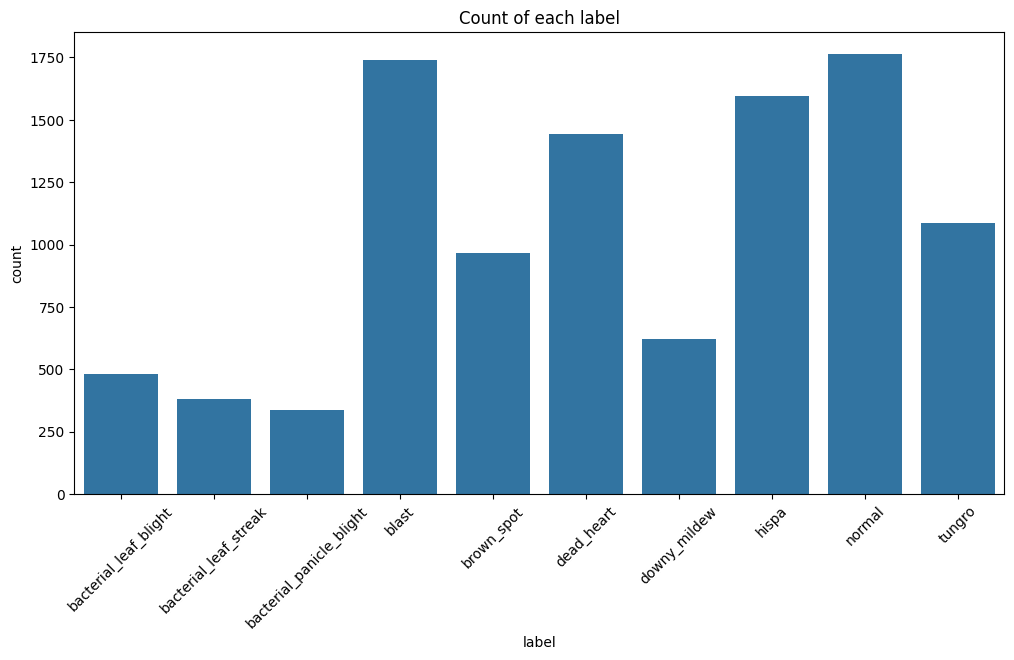

In [7]:
# Plot the data count based on varaity name
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=data)
plt.title('Count of each label')
plt.xticks(rotation=45)
plt.show()

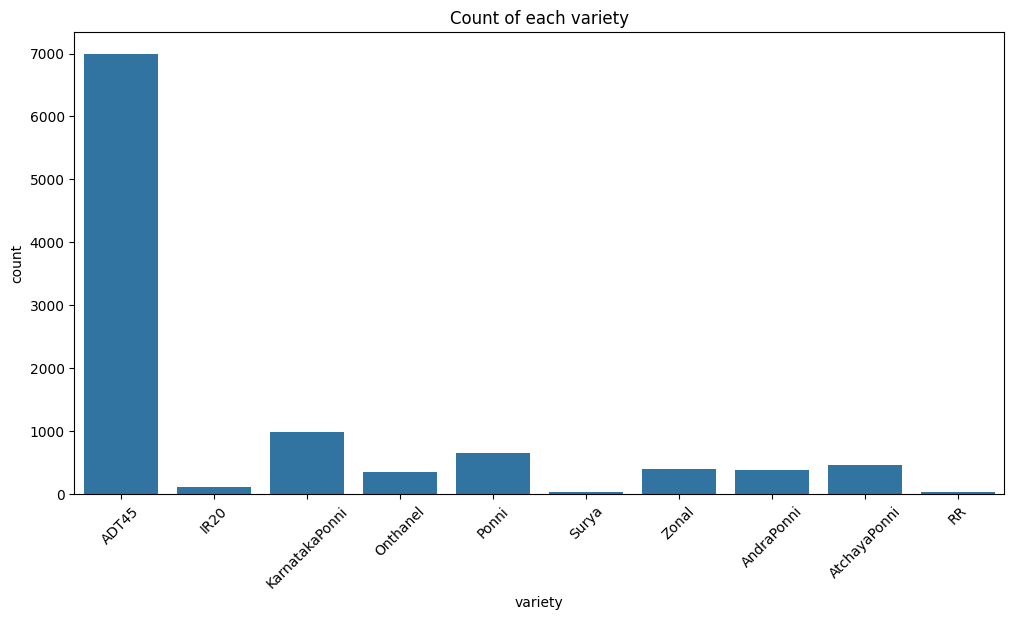

In [8]:
# Plot the data count based on varaity name
plt.figure(figsize=(12,6))
sns.countplot(x='variety', data=data)
plt.title('Count of each variety')
plt.xticks(rotation=45)
plt.show()

In [9]:
normal = data[data['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [10]:
dead = data[data['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

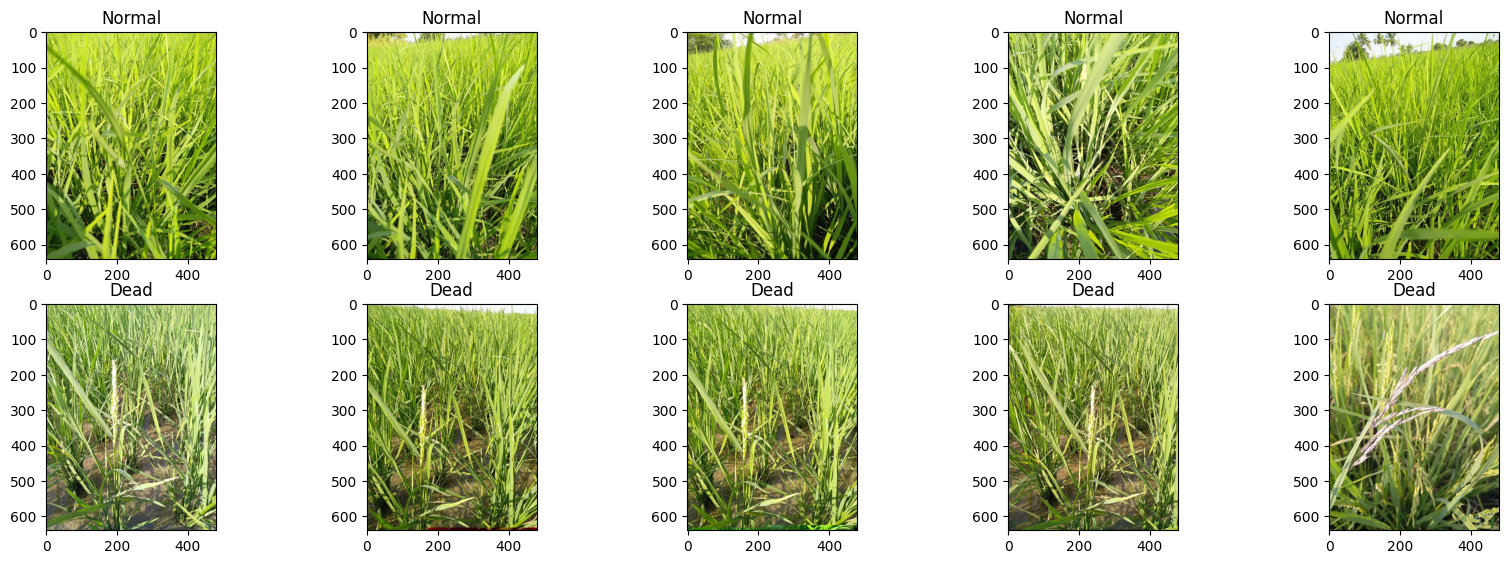

In [11]:
# make plot of images to just have an idea
plt.figure(figsize=(20,10))
columns = 5
path = './Data/train_images/'
for i,image_loc in enumerate(np.concatenate((five_normals,five_deads))):
    plt.subplot(10//columns+1, columns, i + 1)
    if i < 5:
        image = plt.imread(path+"normal/"+image_loc)
        plt.title('Normal')
    else:
        image = plt.imread(path+"dead_heart/"+image_loc)
        plt.title('Dead')
    plt.imshow(image)
plt.show()



In [12]:
data.label.unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

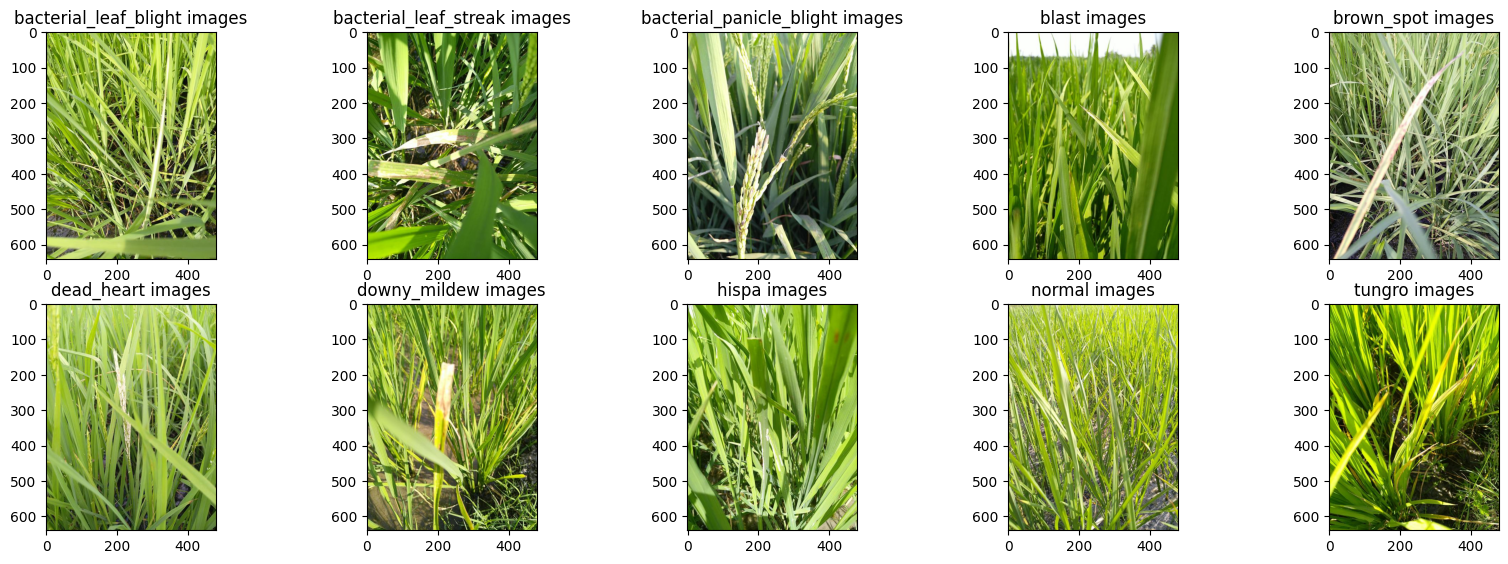

In [13]:
# display one image from all labels
image = [
    "./Data/train_images/bacterial_leaf_blight/100023.jpg",\
    "./Data/train_images/bacterial_leaf_streak/100042.jpg",\
    "./Data/train_images/bacterial_panicle_blight/100043.jpg",\
    "./Data/train_images/blast/100012.jpg",\
    "./Data/train_images/brown_spot/100001.jpg",\
    "./Data/train_images/dead_heart/100008.jpg",\
    "./Data/train_images/downy_mildew/100017.jpg",\
    "./Data/train_images/hispa/100003.jpg",\
    "./Data/train_images/normal/100002.jpg",\
    "./Data/train_images/tungro/100011.jpg",\
    ]

diseases = ['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro']
diseases = [disease +" images" for disease in diseases]

# make plot of images to just have an idea
plt.figure(figsize=(20,10))
columns = 5
path = './Data/train_images/'
for i,image_loc in enumerate(image):
    plt.subplot(10//columns+1, columns, i + 1)
    image = plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)
plt.show()


In [14]:
# encoding the label and variety column using label encoder
from sklearn.preprocessing import LabelEncoder
le_label = LabelEncoder()
le_variety = LabelEncoder()
data['label'] = le_label.fit_transform(data['label'])
data['variety'] = le_variety.fit_transform(data['variety'])
data.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [15]:
# define parameters
batch_size = 32
img_height = 224
img_width = 224

path

'./Data/train_images/'

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    seed=123,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    seed=123,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [19]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [20]:
# normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
# Autotune the data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax') 
])

In [24]:
# compile the model
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [30]:
# save the model
model.save('rice_disease_classification_model.h5')
print("Model saved successfully")   

Model saved successfully


## Observations

1. We have 10407, images in train data
2. We have 10 unique disease classes
3. We also have 10 variesites of RICE in this data
4. We have rise plant age ranging from 45 to 82 days 
5. ADT45 is the most common variety inside the training data.

